# **Classifying Digits with a Simple Feedforward Neural Network (FNN) in PyTorch 🚀**

**Hands on : 2 hours**

In this hands-on project, we’ll build a simple fully connected neural network to classify handwritten digits from the MNIST dataset.

# **📝 Steps Overview**




1. Load and Visualize the MNIST Dataset

2. Build a Fully Connected Neural Network (784 → 128 → 64 → 10)

3. Implement the Training Loop (Forward, Loss, Backward, Optimizer Step)

4. Plot Training and Validation Loss Curves

5. Evaluate Accuracy on the Test Set

# **1️⃣ Load and Visualize the MNIST Dataset 🎨**


PyTorch provides torchvision.datasets for easy dataset handling.



# 🔹 Import Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# 🔹 Load the MNIST Dataset

In [2]:
# Define transformations: convert images to tensors & normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load training & test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders for batch processing
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 14.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.34MB/s]


# 🔹 Visualize Some Sample Digits

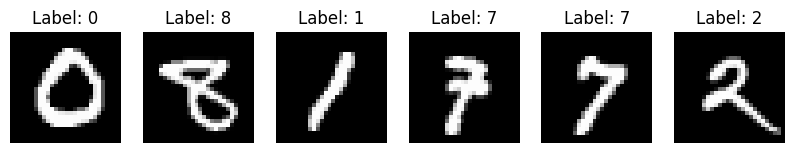

In [3]:
# Get one batch of images and labels
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Plot 6 images
fig, axes = plt.subplots(1, 6, figsize=(10, 3))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis("off")
plt.show()


# **2️⃣ Build a Fully Connected Neural Network (784 → 128 → 64 → 10) 🏗️**

#🔹 Define the Network Architecture

In [4]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # First hidden layer (784 → 128)
        self.fc2 = nn.Linear(128, 64)   # Second hidden layer (128 → 64)
        self.fc3 = nn.Linear(64, 10)    # Output layer (64 → 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten input (28x28 → 784)
        x = F.relu(self.fc1(x))  # Activation for first layer
        x = F.relu(self.fc2(x))  # Activation for second layer
        x = self.fc3(x)  # No activation (logits)
        return x

# Initialize model
model = DigitClassifier()
print(model)


DigitClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


# **3️⃣ Implement Training Loop (Forward, Loss, Backward, Optimizer Step) 🔄**

# 🔹 Define Loss Function & Optimizer

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

criterion = nn.CrossEntropyLoss()  # Suitable for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


# 🔹 Training Function

In [6]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Reset gradients

            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    return train_losses


# 🔹 Train the Model

In [7]:
num_epochs = 10  # Increase for better accuracy
train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs)


Epoch [1/10], Loss: 0.4038
Epoch [2/10], Loss: 0.1987
Epoch [3/10], Loss: 0.1424
Epoch [4/10], Loss: 0.1134
Epoch [5/10], Loss: 0.0970
Epoch [6/10], Loss: 0.0826
Epoch [7/10], Loss: 0.0736
Epoch [8/10], Loss: 0.0664
Epoch [9/10], Loss: 0.0606
Epoch [10/10], Loss: 0.0555


# **4️⃣ Plot Training Loss Curves 📈**

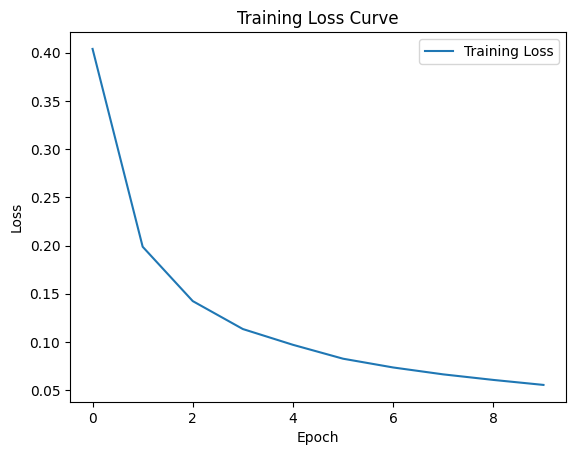

In [8]:
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


# **5️⃣ Evaluate Accuracy on the Test Set 🏆**


# 🔹 Define Evaluation Function

In [10]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients during testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


# 🔹 Run Evaluation

In [11]:
evaluate_model(model, test_loader)


Test Accuracy: 97.22%


# **🎯 Final Summary**


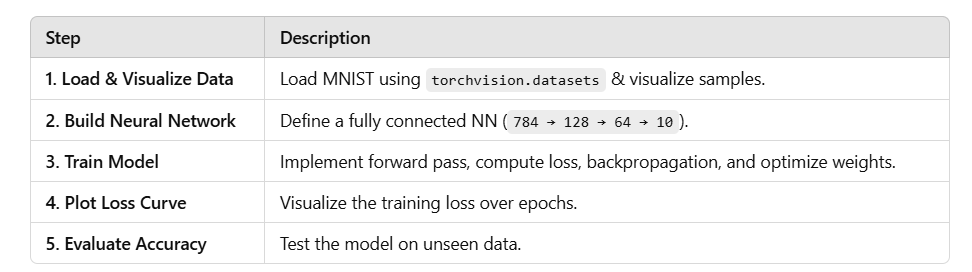

**✅ Next Steps:**



* Increase num_epochs (e.g., 20) to improve accuracy.

* Try different optimizers (e.g., SGD, AdamW).

* Use Convolutional Neural Networks (CNNs) for better performance.